Here, we need to analyse data from recordings. In particular, we should to measure amplitude ratio, decay time of 1 and 5 transporter

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import matplotlib.ticker as ticker
from statannot import add_stat_annotation

from modules.graphics_handler import boxplot_fine_view,adjust_box_widths, boxplot_hue
from modules.data_loader import file_extraction, file_folder_creator,stat_out

Step 1. Import data from excel to pandas df

In [3]:
data = pd.read_excel('data\\rec_count.xlsx')
data.head()

,cell_num,IGluT(5),IGluT(1),τdecay IGluT(5),τdecay IGluT(1),Group
0,180720_017,-90.914145,-57.691506,12.338245,9.486606,Контроль
1,180720_020,-34.242714,-19.659381,14.291741,11.415268,Контроль
2,180724_015,-77.306295,-56.221680,11.211063,12.065621,Контроль
3,180725_005,-30.638028,-18.826480,10.472696,9.553450,Контроль
4,CTRL_FOR_OLGA_2,-9.960000,-8.280000,8.812230,8.371306,Контроль


Create the folder to save figures

In [4]:
file_folder_creator('figs/rec_count')

'Folder created'

Step 2. Calculate amplitude ratio and decay time

Calculate amplitude and decay time ratio as ratio IGluT(5) to IGluT(1)

In [5]:
data['IGluT(5)/IGluT(1)'] = data['IGluT(5)']/data['IGluT(1)']
data ['τdecay IGluT(5)/τdecay IGluT(1)'] = data['τdecay IGluT(5)']/data['τdecay IGluT(1)']
data.head()

,cell_num,IGluT(5),IGluT(1),τdecay IGluT(5),τdecay IGluT(1),Group,IGluT(5)/IGluT(1),τdecay IGluT(5)/τdecay IGluT(1)
0,180720_017,-90.914145,-57.691506,12.338245,9.486606,Контроль,1.575867,1.300596
1,180720_020,-34.242714,-19.659381,14.291741,11.415268,Контроль,1.741800,1.251985
2,180724_015,-77.306295,-56.221680,11.211063,12.065621,Контроль,1.375026,0.929174
3,180725_005,-30.638028,-18.826480,10.472696,9.553450,Контроль,1.627390,1.096221
4,CTRL_FOR_OLGA_2,-9.960000,-8.280000,8.812230,8.371306,Контроль,1.202899,1.052671


Transform df to create hue-groupped boxplot

In [6]:
amplitude = pd.melt (data, id_vars= ['Group'], 
                            value_vars=['IGluT(1)','IGluT(5)'],
                            var_name= '', value_name= 'Амплитуда, pA')
amplitude.head()

,Group,,"Амплитуда, pA"
0,Контроль,IGluT(1),-57.691506
1,Контроль,IGluT(1),-19.659381
2,Контроль,IGluT(1),-56.221680
3,Контроль,IGluT(1),-18.826480
4,Контроль,IGluT(1),-8.280000


Bulid the boxplot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IGluT(5)_Контроль v.s. IGluT(5)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=7.748e-01 U_stat=1.850e+01
IGluT(1)_Контроль v.s. IGluT(1)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=8.862e-01 U_stat=2.250e+01


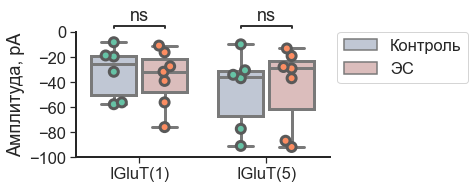

In [8]:
stat = boxplot_hue(data=amplitude, x = '', y='Амплитуда, pA', hue='Group',
                box_pairs =  [(('IGluT(1)','Контроль' ),
                                ('IGluT(1)','ЭС')),
                                (('IGluT(5)','Контроль'),
                                ('IGluT(5)','ЭС'))],
                figname = 'амплитуды',
                big_tick = 20, 
                ylim = [-100, 0], 
                figsize=(7,3),
                loc='outside')

Import statistics to df

In [9]:
stat_output = stat_out(stat, index = ['IGluT(1)', 'IGluT(5)'])
stat_output

,p_val,u_stat
IGluT(1),7.748e-01,1.850e+01
IGluT(5),8.862e-01,2.250e+01


Repeat these procedures for remaining features: 'IGluT(5)/IGluT(1)', 'τdecay IGluT(1)', 'τdecay IGluT(5)', 'τdecay IGluT(5)/τdecay IGluT(1)'

In [10]:
amplitude_relation = pd.melt (data, id_vars= ['Group'], 
                            value_vars=['IGluT(5)/IGluT(1)'],
                            var_name= '', value_name= 'Отношение амплитуд')
amplitude_relation.head()

,Group,,Отношение амплитуд
0,Контроль,IGluT(5)/IGluT(1),1.575867
1,Контроль,IGluT(5)/IGluT(1),1.741800
2,Контроль,IGluT(5)/IGluT(1),1.375026
3,Контроль,IGluT(5)/IGluT(1),1.627390
4,Контроль,IGluT(5)/IGluT(1),1.202899


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IGluT(5)/IGluT(1)_Контроль v.s. IGluT(5)/IGluT(1)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=8.604e-02 U_stat=3.350e+01


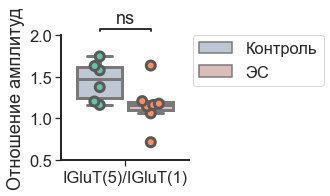

In [11]:
stat = boxplot_hue(data=amplitude_relation, x = '', y='Отношение амплитуд', hue='Group',
                box_pairs =  [(('IGluT(5)/IGluT(1)','Контроль' ),
                                ('IGluT(5)/IGluT(1)','ЭС'))],
                figname = 'отношения амплитуд',
                big_tick = 0.5, 
                ylim = [0.5, 2], 
                figsize=(5,3),
                loc='outside')

In [14]:
stat_output = pd.concat ([stat_output, stat_out(stat, index = ['IGluT(5)/IGluT(1)'])])
stat_output

,p_val,u_stat
IGluT(1),7.748e-01,1.850e+01
IGluT(5),8.862e-01,2.250e+01
IGluT(5)/IGluT(1),8.604e-02,3.350e+01


In [16]:
decay_time = pd.melt (data, id_vars= ['Group'], 
                            value_vars=['τdecay IGluT(1)', 'τdecay IGluT(5)'],
                            var_name= '', value_name= 'Время затухания, мс')
decay_time.head()

,Group,,"Время затухания, мс"
0,Контроль,τdecay IGluT(1),9.486606
1,Контроль,τdecay IGluT(1),11.415268
2,Контроль,τdecay IGluT(1),12.065621
3,Контроль,τdecay IGluT(1),9.553450
4,Контроль,τdecay IGluT(1),8.371306


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

τdecay IGluT(5)_Контроль v.s. τdecay IGluT(5)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=4.452e-01 U_stat=1.500e+01
τdecay IGluT(1)_Контроль v.s. τdecay IGluT(1)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=5.338e-01 U_stat=1.600e+01


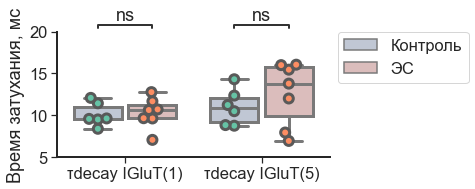

In [26]:
stat = boxplot_hue(data=decay_time, x = '', y='Время затухания, мс', hue='Group',
                box_pairs =  [(('τdecay IGluT(1)','Контроль' ),
                                ('τdecay IGluT(1)','ЭС')),
                                (('τdecay IGluT(5)','Контроль'), 
                                 ('τdecay IGluT(5)','ЭС'))],
                figname = 'время затухания',
                big_tick = 5, 
                ylim = [5, 20], 
                figsize=(7,3),
                loc='outside')

In [27]:
stat_output = pd.concat ([stat_output, stat_out(stat, index = ['τdecay IGluT(1)', 'τdecay IGluT(5)'])])
stat_output

,p_val,u_stat
IGluT(1),7.748e-01,1.850e+01
IGluT(5),8.862e-01,2.250e+01
IGluT(5)/IGluT(1),8.604e-02,3.350e+01
τdecay IGluT(1),4.452e-01,1.500e+01
τdecay IGluT(5),5.338e-01,1.600e+01


In [48]:
decay_time_relation = pd.melt (data, id_vars= ['Group'], 
                            value_vars=['τdecay IGluT(5)/τdecay IGluT(1)'],
                            var_name= '', value_name= 'Отношение времени затухания')
decay_time_relation.head()

,Group,,Отношение времени затухания
0,Контроль,τdecay IGluT(5)/τdecay IGluT(1),1.300596
1,Контроль,τdecay IGluT(5)/τdecay IGluT(1),1.251985
2,Контроль,τdecay IGluT(5)/τdecay IGluT(1),0.929174
3,Контроль,τdecay IGluT(5)/τdecay IGluT(1),1.096221
4,Контроль,τdecay IGluT(5)/τdecay IGluT(1),1.052671


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

τdecay IGluT(5)/τdecay IGluT(1)_Контроль v.s. τdecay IGluT(5)/τdecay IGluT(1)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=4.452e-01 U_stat=1.500e+01


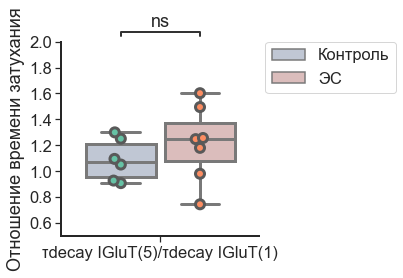

In [53]:
stat = boxplot_hue(data=decay_time_relation, x = '', y='Отношение времени затухания', hue='Group',
                box_pairs =  [(('τdecay IGluT(5)/τdecay IGluT(1)','Контроль' ),
                                ('τdecay IGluT(5)/τdecay IGluT(1)','ЭС'))],
                figname = 'Отношение времени затухания',
                big_tick = 0.2, 
                ylim = [0.5, 2], 
                figsize=(6,4),
                loc='outside')

In [38]:
stat_output = pd.concat ([stat_output, stat_out(stat, index = ['τdecay IGluT(5)/τdecay IGluT(1)'])])
stat_output

,p_val,u_stat
IGluT(1),7.748e-01,1.850e+01
IGluT(5),8.862e-01,2.250e+01
IGluT(5)/IGluT(1),8.604e-02,3.350e+01
τdecay IGluT(1),4.452e-01,1.500e+01
τdecay IGluT(5),5.338e-01,1.600e+01
τdecay IGluT(5)/τdecay IGluT(1),4.452e-01,1.500e+01


We have to  calculate the percentiles described our features

In [39]:
perc_table_final = data.quantile([0.25, 0.50 , 0.75])
perc_table_final

,IGluT(5),IGluT(1),τdecay IGluT(5),τdecay IGluT(1),IGluT(5)/IGluT(1),τdecay IGluT(5)/τdecay IGluT(1)
0.25,-77.306295,-56.210698,8.812230,9.553450,1.161523,0.981837
0.50,-34.242714,-31.829147,11.991837,9.635286,1.202899,1.181248
0.75,-28.020000,-18.826480,14.291741,11.415268,1.575867,1.257125


In [40]:
with pd.ExcelWriter('output_table/final_out_rec_count.xlsx') as writer:  
     perc_table_final.to_excel(writer, sheet_name='Percentiles', float_format="%.2f")
     stat_output.to_excel(writer, sheet_name='P-val, MW(U)', float_format="%.2f")

Profit!